## Import Library

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

2025-04-16 21:45:15.074711: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.metrics import classification_report

## Load data

In [3]:
data = fashion_mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()

In [5]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

In [7]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Show Sample Images

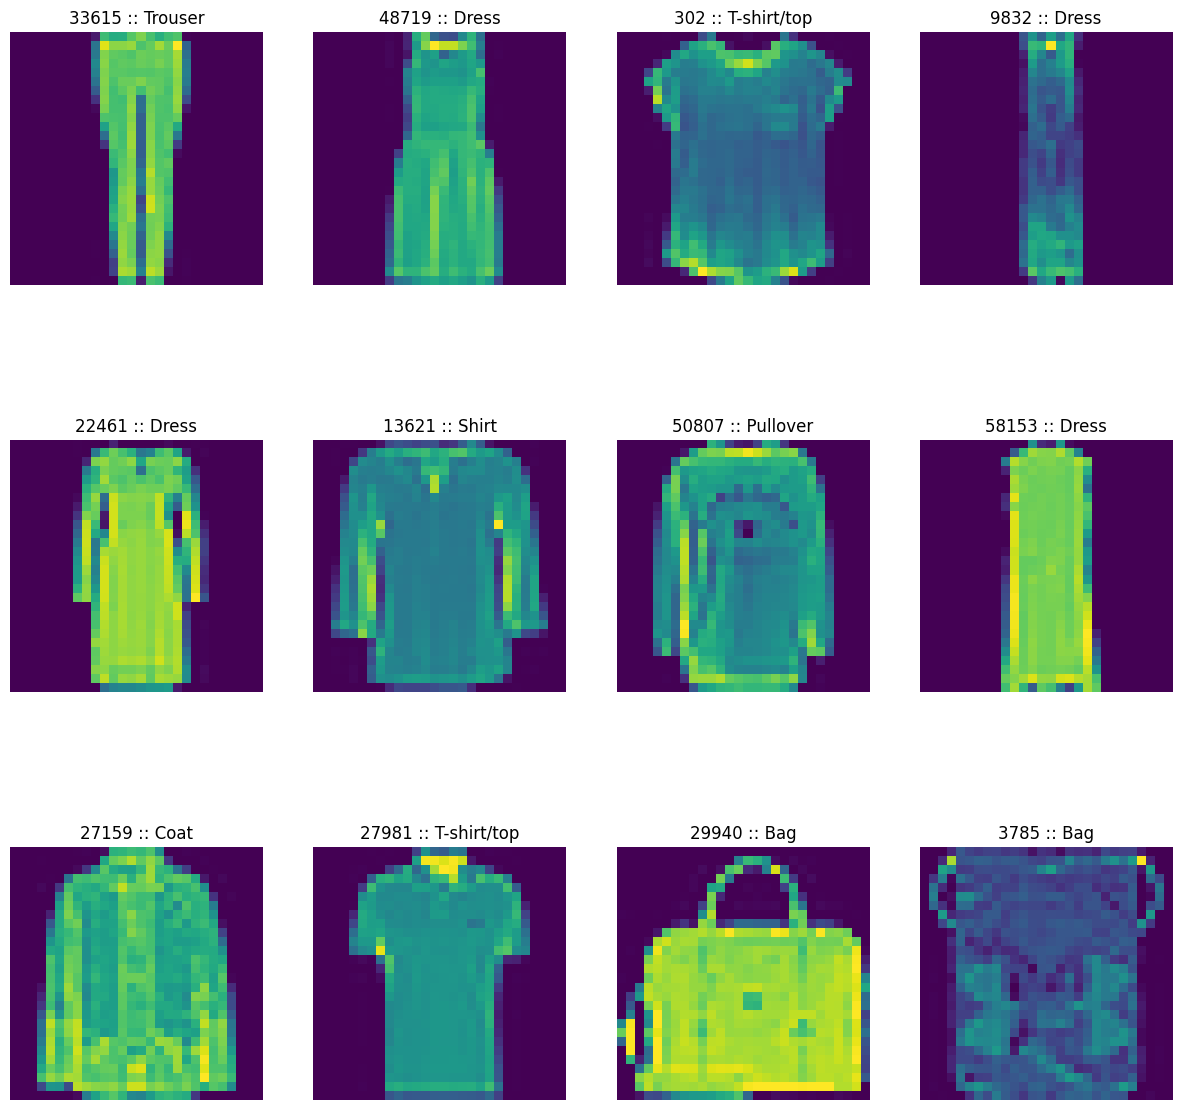

In [8]:
img_idx = np.random.choice(X_train.shape[0], 12)

plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[idx])
    label_idx = Y_train[idx]
    plt.title(f"{idx} :: {labels[label_idx]}")
    plt.axis("off")

## Data preprocessing

### Normalization

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

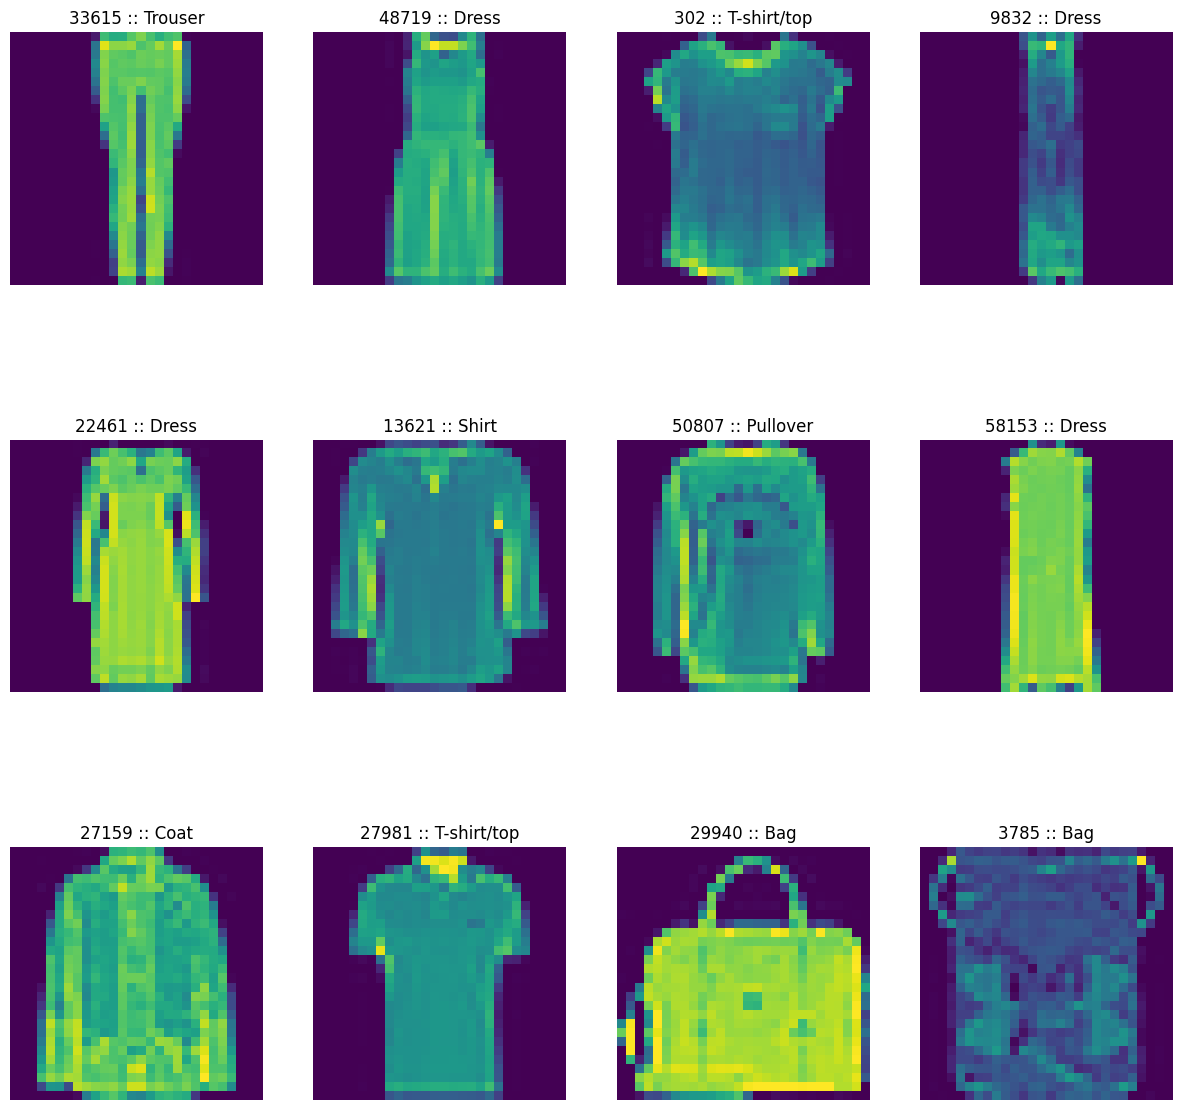

In [10]:
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[idx])
    label_idx = Y_train[idx]
    plt.title(f"{idx} :: {labels[label_idx]}")
    plt.axis("off")

### Image to vector

In [11]:
X_train.reshape(60000, 1,-1).shape

(60000, 1, 784)

In [12]:
flatten_X_train = X_train.reshape(60000, 784)
flatten_X_test = X_test.reshape(10000, 784)

In [13]:
flatten_X_train.shape, flatten_X_test.shape

((60000, 784), (10000, 784))

### One hot encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder()
enc_Y_train = encoder.fit_transform(Y_train.reshape(-1,1))
enc_Y_train = enc_Y_train.toarray()
enc_Y_test = encoder.transform(Y_test.reshape(-1,1))
enc_Y_test = enc_Y_test.toarray()

In [16]:
enc_Y_train.shape, enc_Y_test.shape

((60000, 10), (10000, 10))

### Split train-valid set

In [17]:
enc_Y_test.shape[0] / (enc_Y_train.shape[0] + enc_Y_test.shape[0])

0.14285714285714285

In [18]:
enc_Y_train.shape[0] / (enc_Y_train.shape[0] + enc_Y_test.shape[0])

0.8571428571428571

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_X, val_X, train_y, val_y = train_test_split(flatten_X_train, enc_Y_train, test_size=0.3, random_state=0)

In [21]:
train_X.shape, train_y.shape

((42000, 784), (42000, 10))

In [22]:
val_X.shape, val_y.shape

((18000, 784), (18000, 10))

## Create model

### Model sequential

In [23]:
model = Sequential()

In [24]:
model.add(Dense(units=784, activation='sigmoid', input_shape = (train_X.shape[1],)))
model.add(Dense(units=10, activation='softmax'))

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [26]:
model.compile(optimizer='SGD', metrics=['accuracy'],
             loss='categorical_crossentropy')

### Train model

In [27]:
model.fit(x=train_X, y=train_y, epochs=10, 
          batch_size=100, validation_data=(val_X, val_y))

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4538 - loss: 1.9606 - val_accuracy: 0.6999 - val_loss: 1.3161
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7046 - loss: 1.2168 - val_accuracy: 0.7190 - val_loss: 1.0128
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7285 - loss: 0.9617 - val_accuracy: 0.7312 - val_loss: 0.8788
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7362 - loss: 0.8498 - val_accuracy: 0.7406 - val_loss: 0.8050
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7503 - loss: 0.7767 - val_accuracy: 0.7481 - val_loss: 0.7558
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7560 - loss: 0.7348 - val_accuracy: 0.7547 - val_loss: 0.7218
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7633 - loss: 0.7053 - val_accuracy: 0.7616 - val_loss: 0.6948
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7730 - loss: 0.6709 - val_accuracy: 0.

### Training evaluation

In [28]:
hist = model.history.history

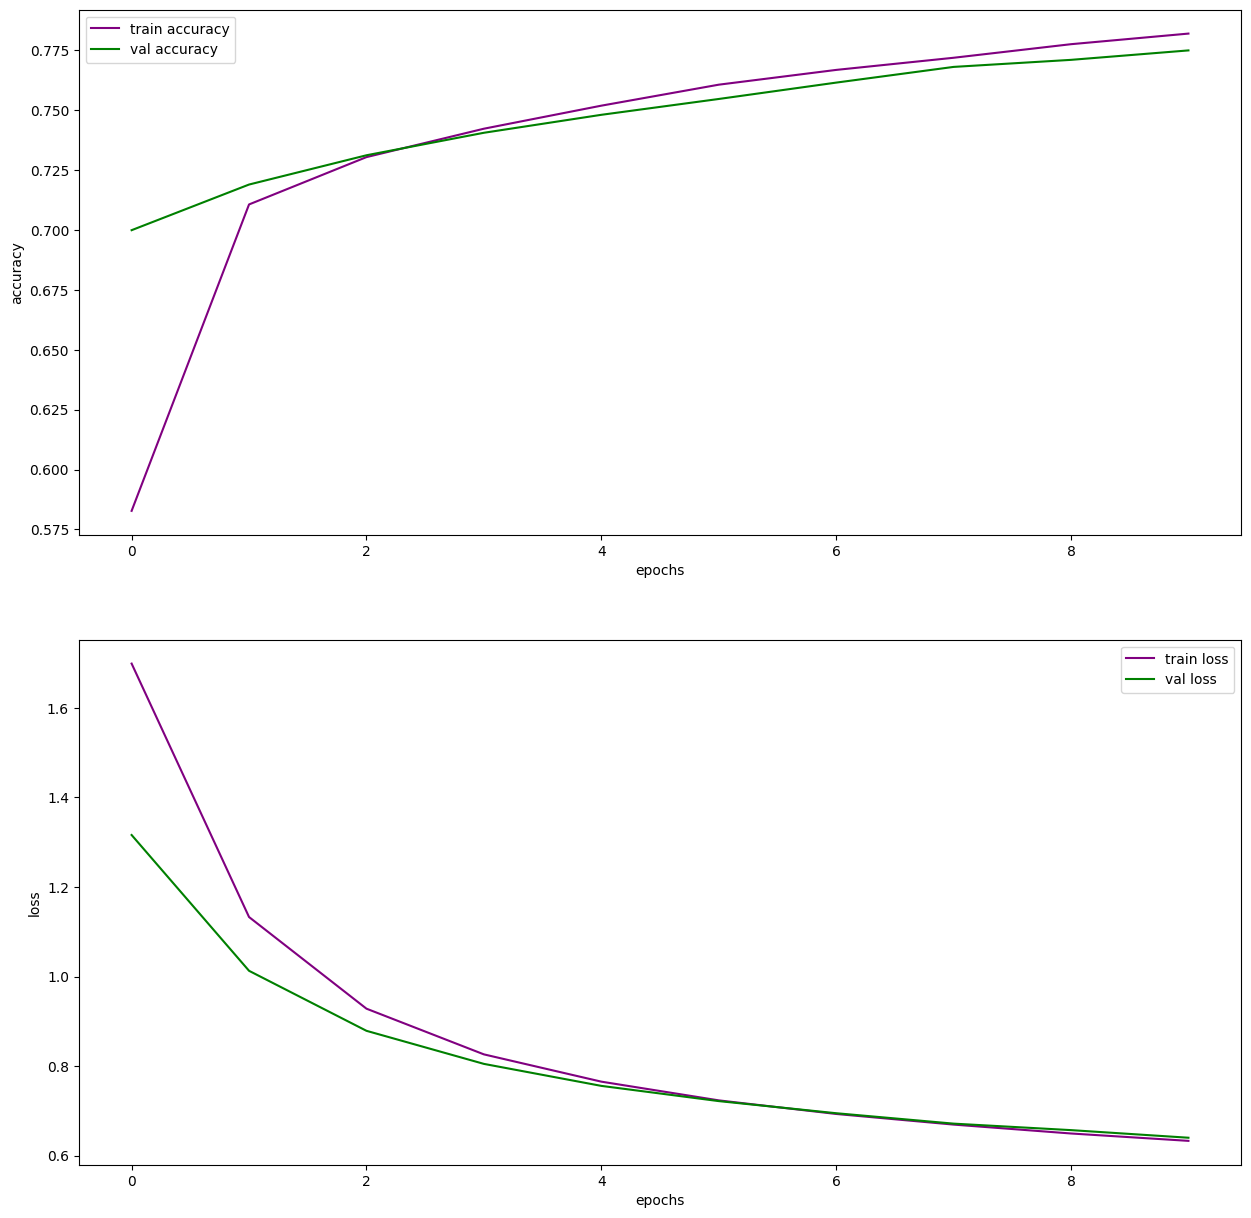

In [29]:
plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Test model

In [30]:
y_hat = model.predict(flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
y_hat_idx = [np.argmax(pred) for pred in y_hat]

In [32]:
y_hat_idx[0], Y_test[0]

(9, 9)

In [33]:
y_hat[0]

array([2.8546003e-04, 1.6861380e-04, 1.5460681e-03, 6.0272345e-04,
       1.1574453e-03, 3.2183042e-01, 1.4481001e-03, 2.2059496e-01,
       4.0326271e-02, 4.1203997e-01], dtype=float32)

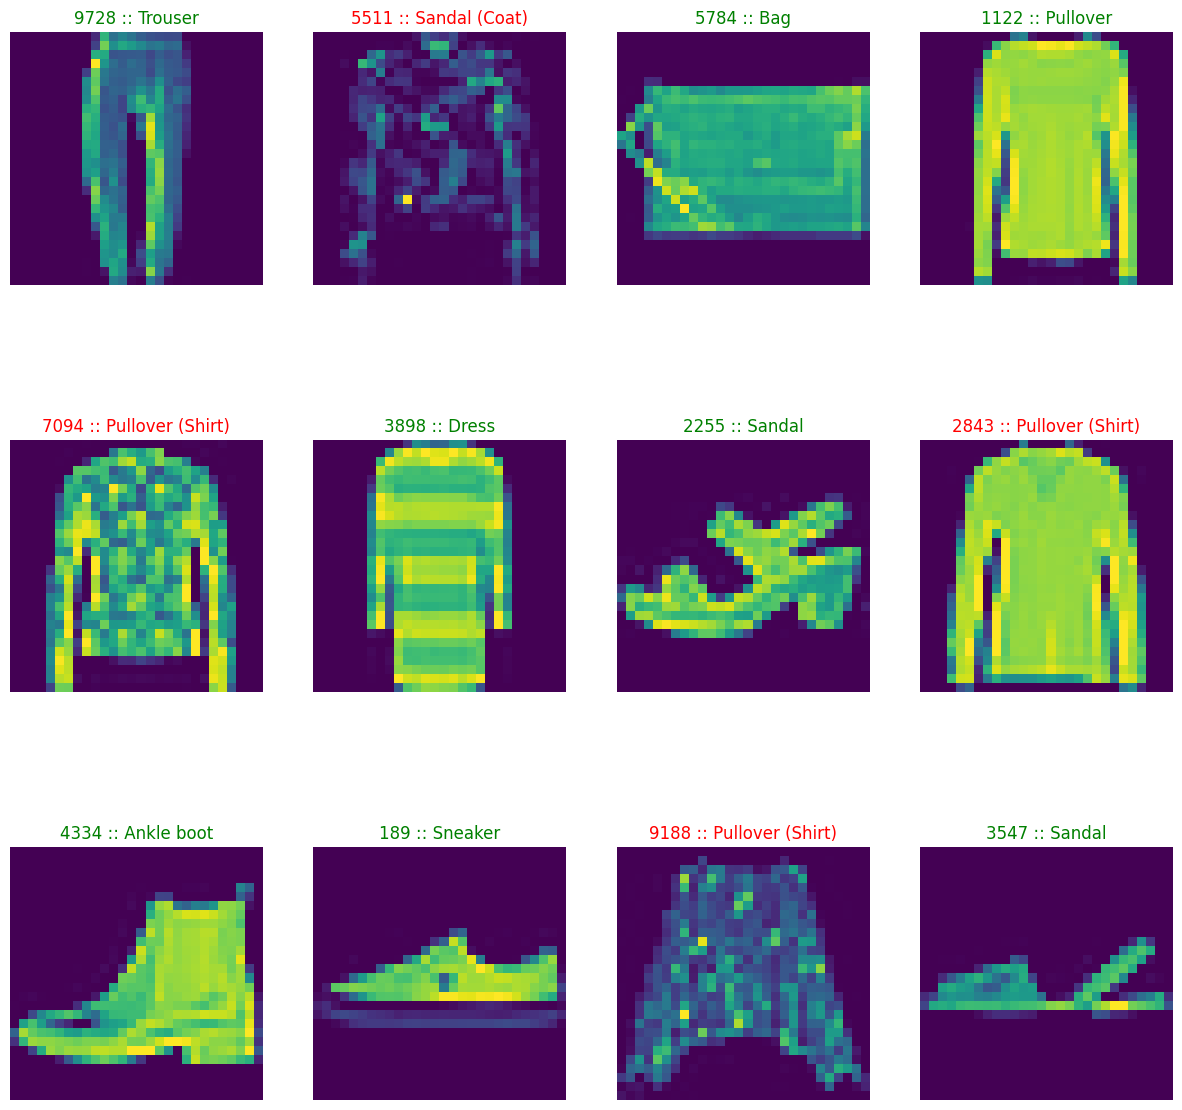

In [34]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [35]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 77.09%


### Classification report

In [36]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.73      0.79      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.61      0.70      0.65      1000
       Dress       0.75      0.83      0.79      1000
        Coat       0.65      0.64      0.65      1000
      Sandal       0.84      0.80      0.82      1000
       Shirt       0.51      0.33      0.40      1000
     Sneaker       0.82      0.85      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.86      0.93      0.89      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [37]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])

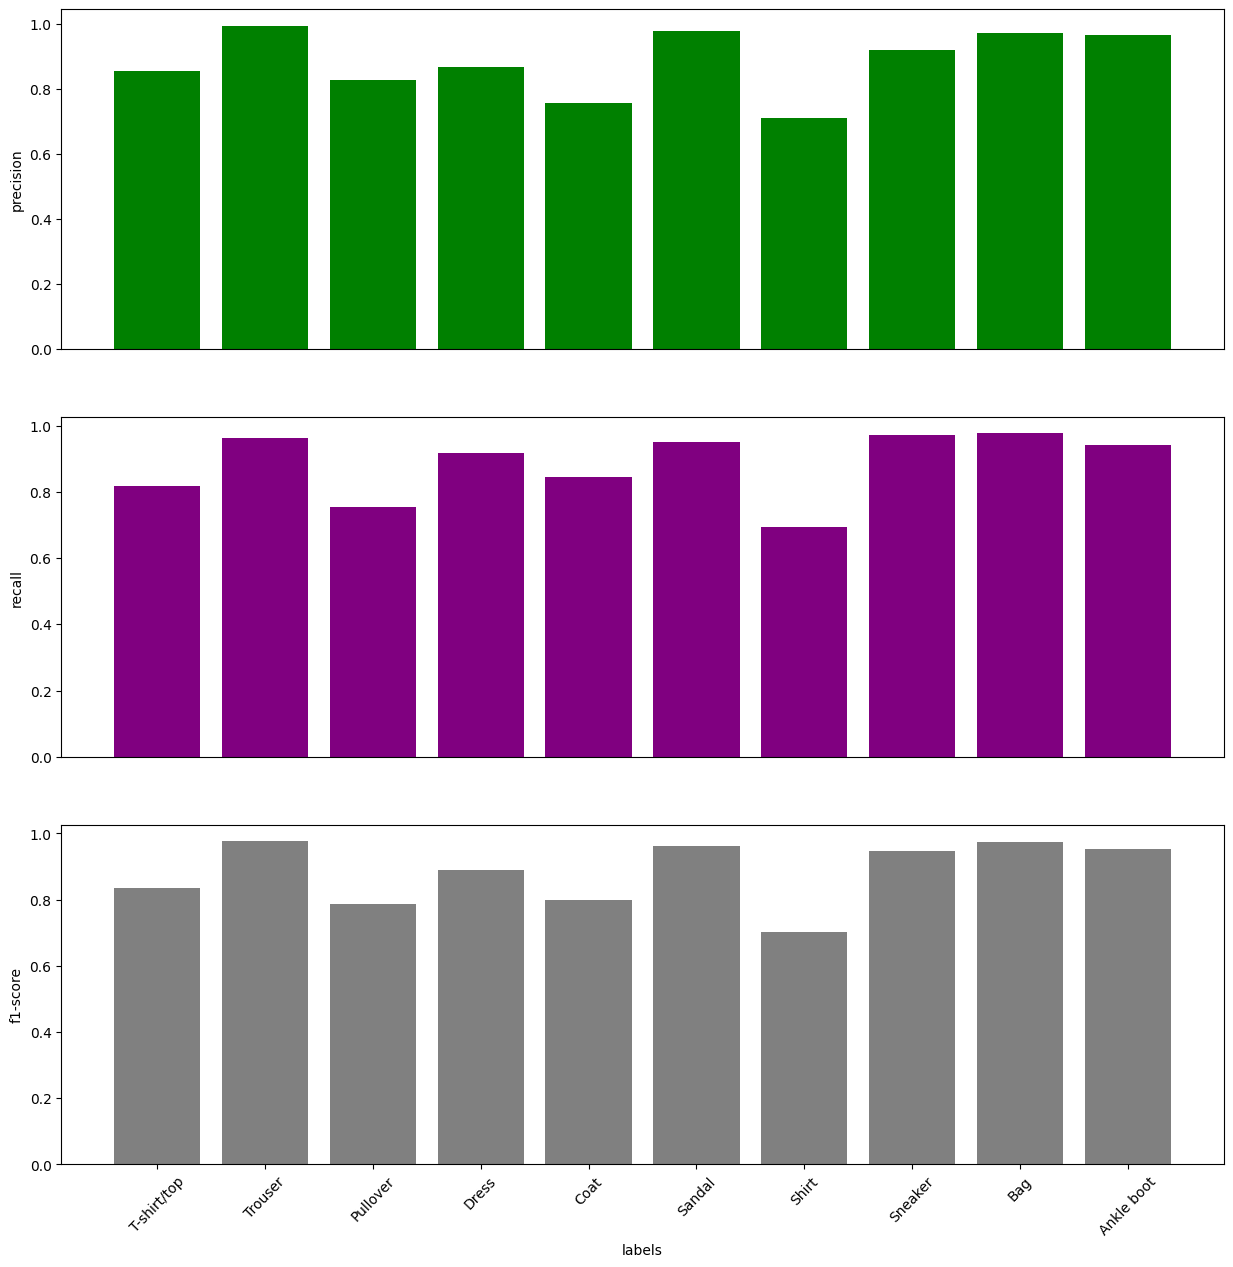

In [98]:
plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

## Create model with ReLU

### Model sequential

In [39]:
model2 = Sequential()

In [40]:
model2.add(Dense(units=784, activation='relu', input_shape=(train_X.shape[1],)))
model2.add(Dense(units=10, activation='softmax'))

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

### Model compile

In [42]:
model2.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

### Train model

In [43]:
model2.fit(x=train_X, y=train_y, 
           validation_data=(val_X, val_y), epochs=10, batch_size=100)

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7635 - loss: 0.6767 - val_accuracy: 0.8543 - val_loss: 0.4143
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8589 - loss: 0.3908 - val_accuracy: 0.8684 - val_loss: 0.3672
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8711 - loss: 0.3498 - val_accuracy: 0.8761 - val_loss: 0.3453
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8847 - loss: 0.3158 - val_accuracy: 0.8821 - val_loss: 0.3267
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8934 - loss: 0.2913 - val_accuracy: 0.8781 - val_loss: 0.3421
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8977 - loss: 0.2736 - val_accuracy: 0.8868 - val_loss: 0.3177
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9030 - loss: 0.2600 - val_accuracy: 0.8872 - val_loss: 0.3151
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9062 - loss: 0.2513 - val_accu

### Training evaluation

In [44]:
hist = model2.history.history

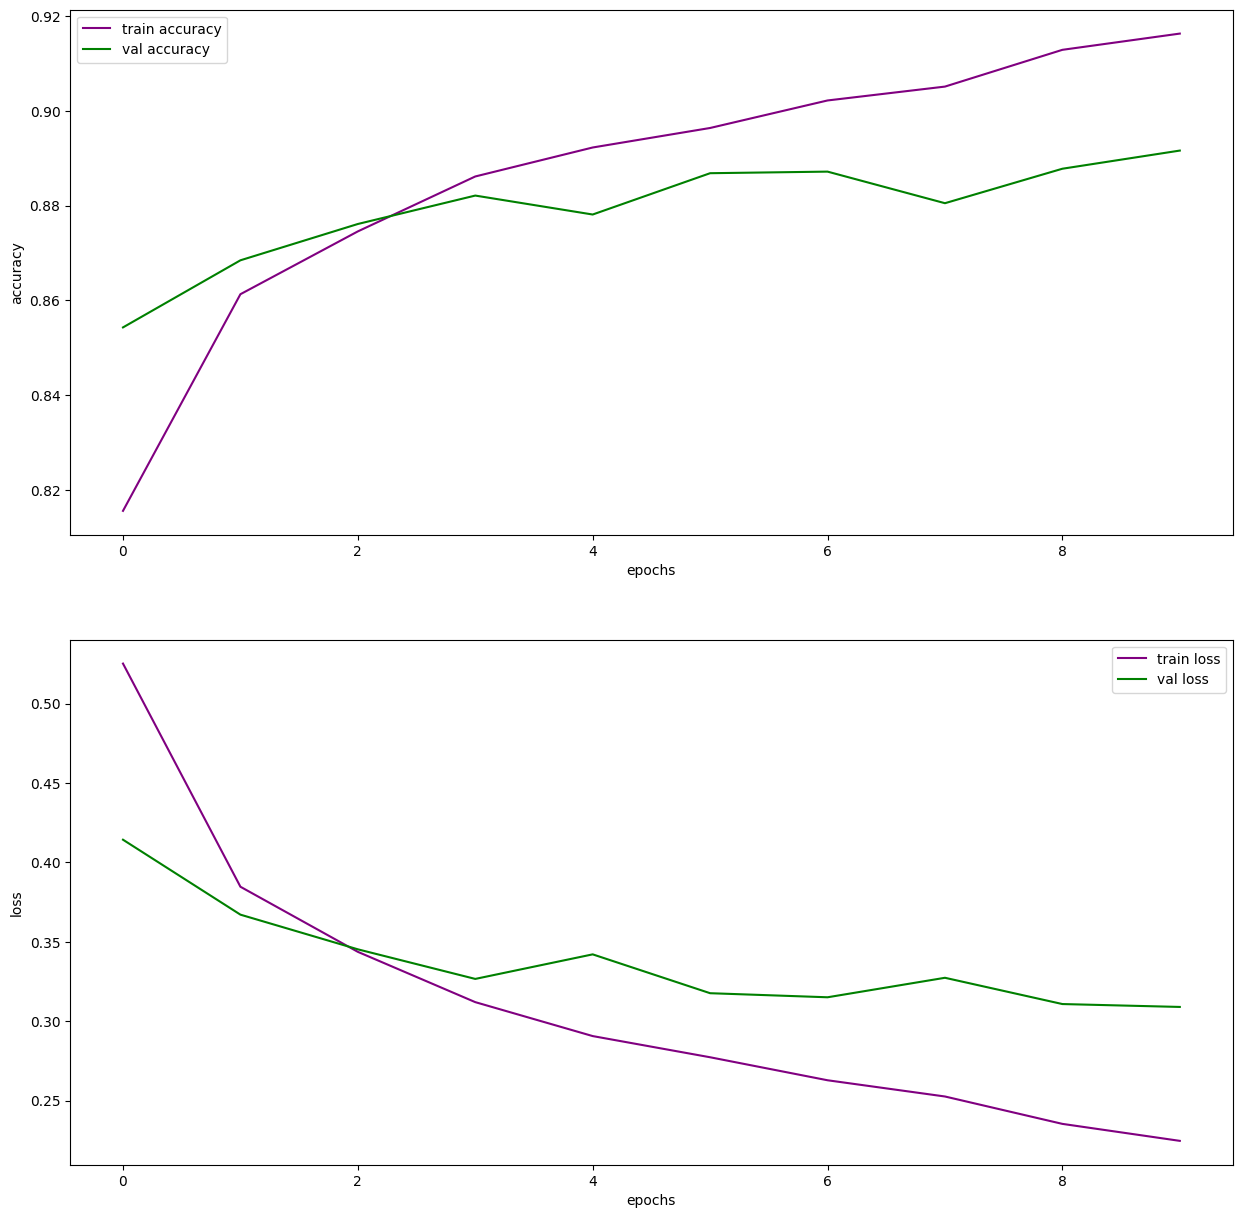

In [45]:
plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Test model

In [46]:
y_hat = model2.predict(flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [47]:
y_hat_idx = [np.argmax(pred) for pred in y_hat]
y_hat_idx[0], Y_test[0]

(9, 9)

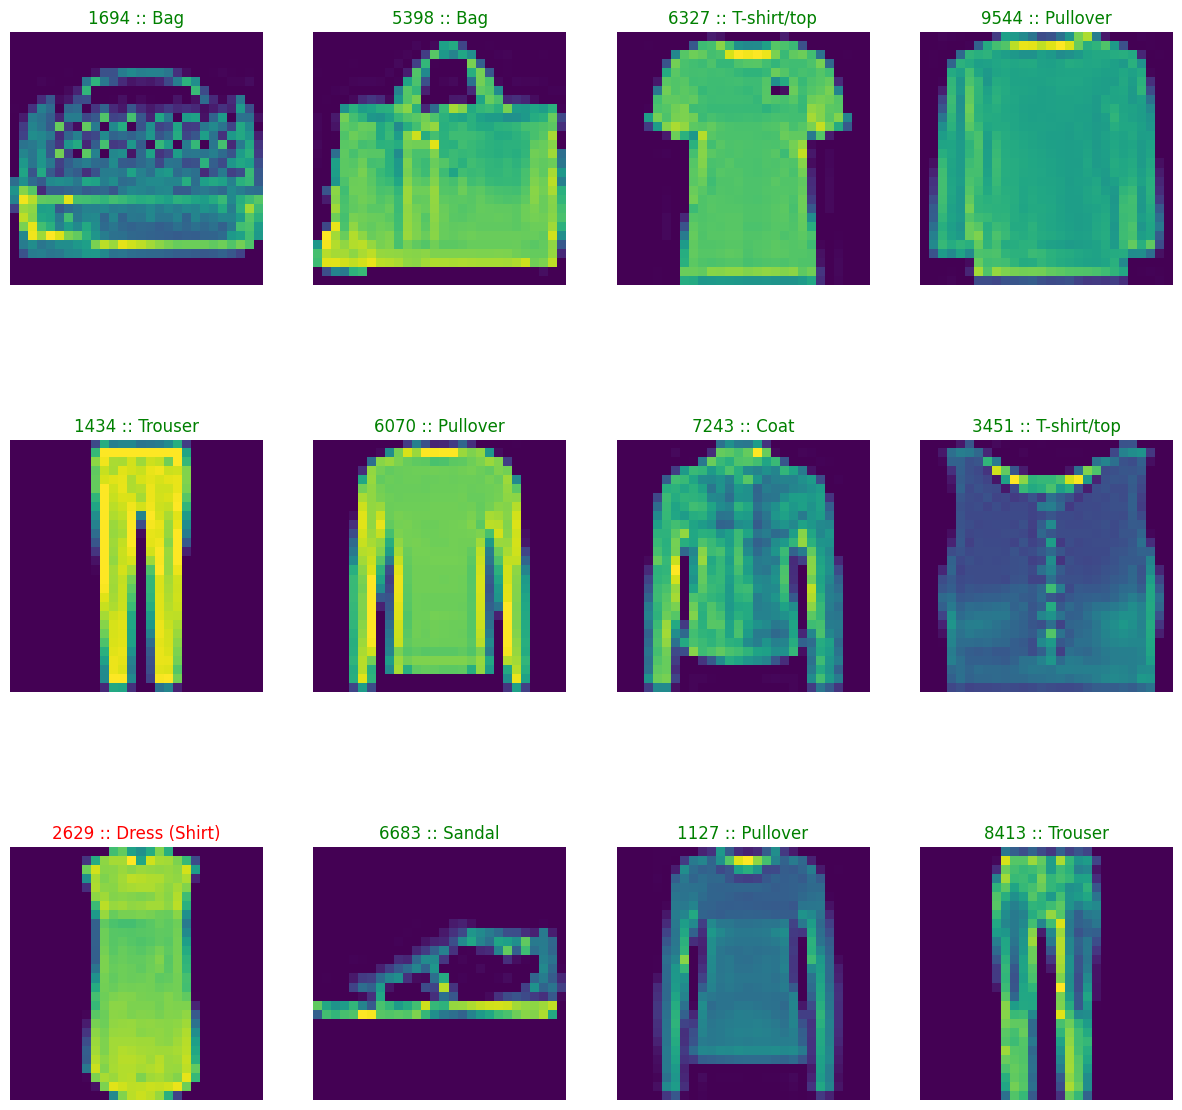

In [48]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [49]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 88.16%


### Classification report

In [50]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.83      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.85      0.73      0.79      1000
       Dress       0.83      0.94      0.88      1000
        Coat       0.82      0.78      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.67      0.73      0.70      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [51]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])

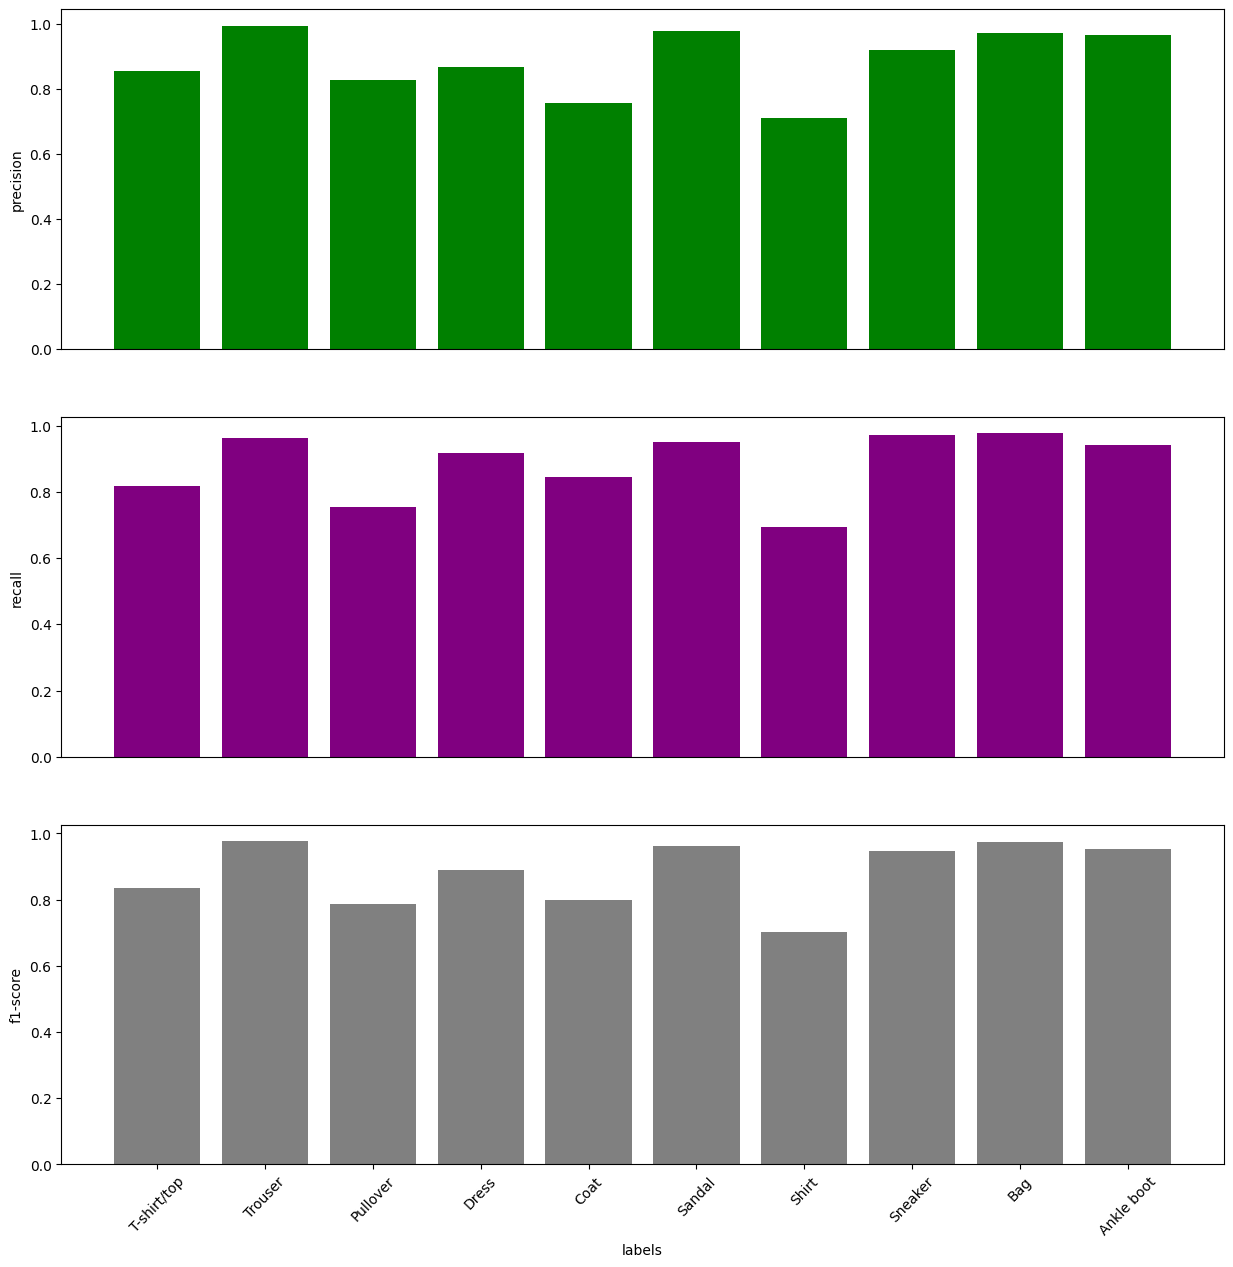

In [97]:
plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

## Create model with callbacks

### early stopping

#### Model sequential

In [53]:
model3 = Sequential()
model3.add(Dense(units=784, activation='relu', input_shape=(train_X.shape[1],)))
model3.add(Dense(units=10, activation='softmax'))

model3.summary()

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

#### Model compile

In [54]:
model3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

#### Add eatly stopping

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
earlystopping = EarlyStopping(monitor='val_accuracy', patience=3)

#### Train model

In [57]:
model3.fit(x=train_X, y=train_y, epochs=10,batch_size=100, 
           callbacks=[earlystopping], validation_data=(val_X, val_y))

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7630 - loss: 0.6850 - val_accuracy: 0.8572 - val_loss: 0.4040
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8569 - loss: 0.3998 - val_accuracy: 0.8401 - val_loss: 0.4279
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8761 - loss: 0.3415 - val_accuracy: 0.8672 - val_loss: 0.3645
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8872 - loss: 0.3128 - val_accuracy: 0.8794 - val_loss: 0.3423
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8884 - loss: 0.2956 - val_accuracy: 0.8811 - val_loss: 0.3264
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8936 - loss: 0.2853 - val_accuracy: 0.8815 - val_loss: 0.3227
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9050 - loss: 0.2535 - val_accuracy: 0.8913 - val_loss: 0.3074
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9074 - loss: 0.2493 - val_accu

#### Training evaluation

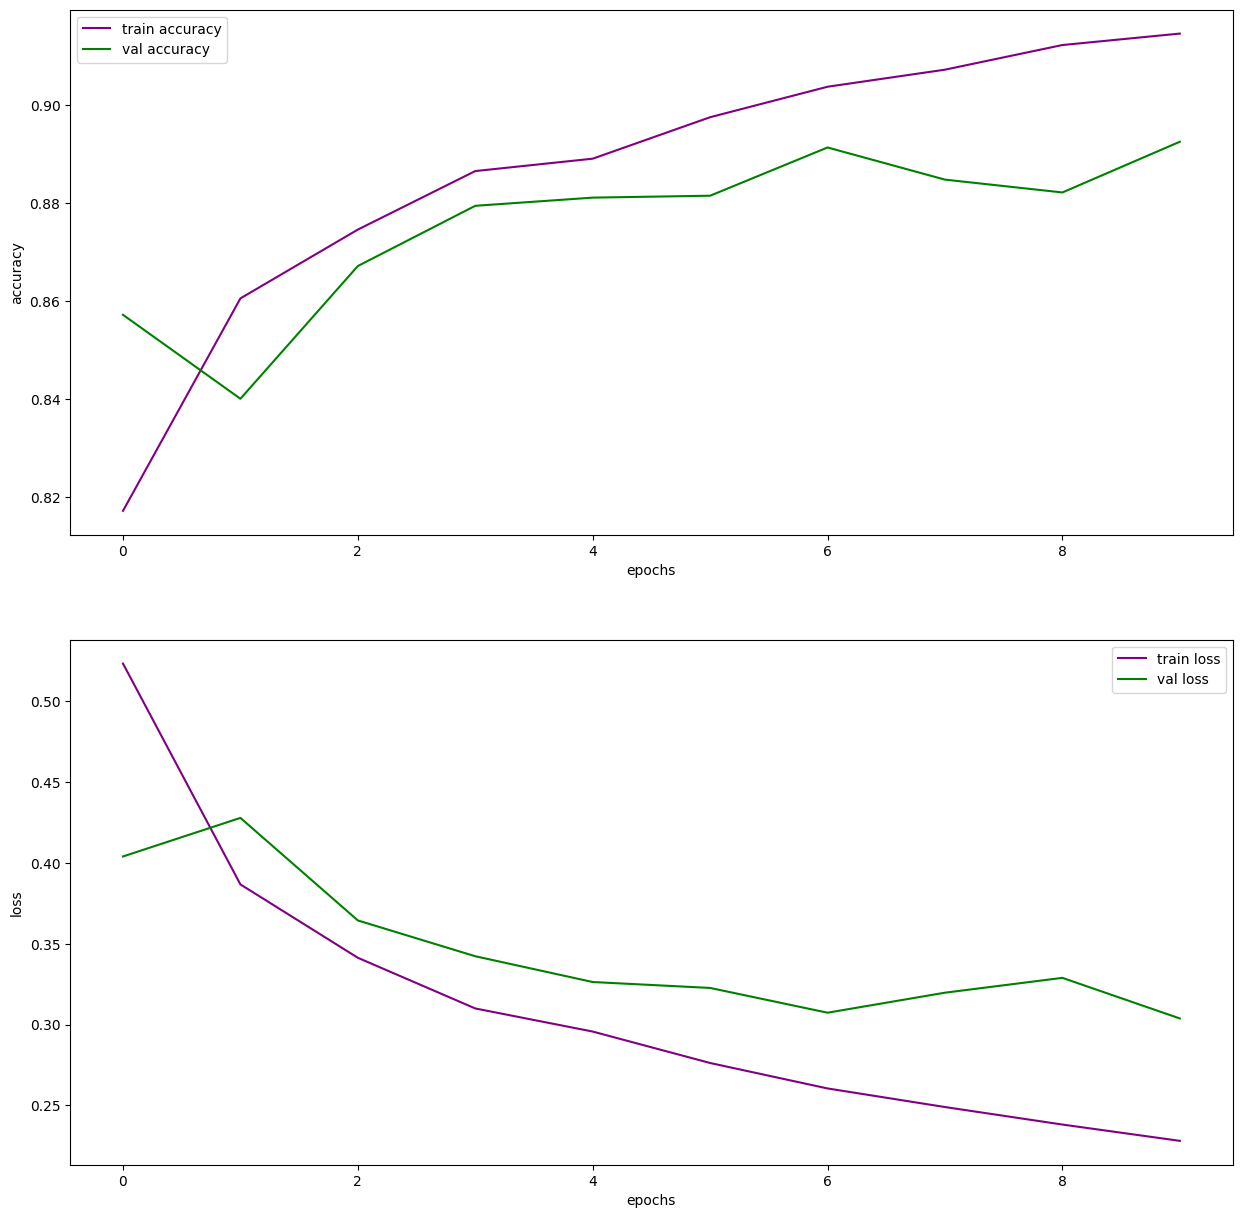

In [58]:
hist = model3.history.history

plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Test model

In [59]:
y_hat = model3.predict(flatten_X_test)
y_hat_idx = [np.argmax(pred) for pred in y_hat]
y_hat_idx[0], Y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(9, 9)

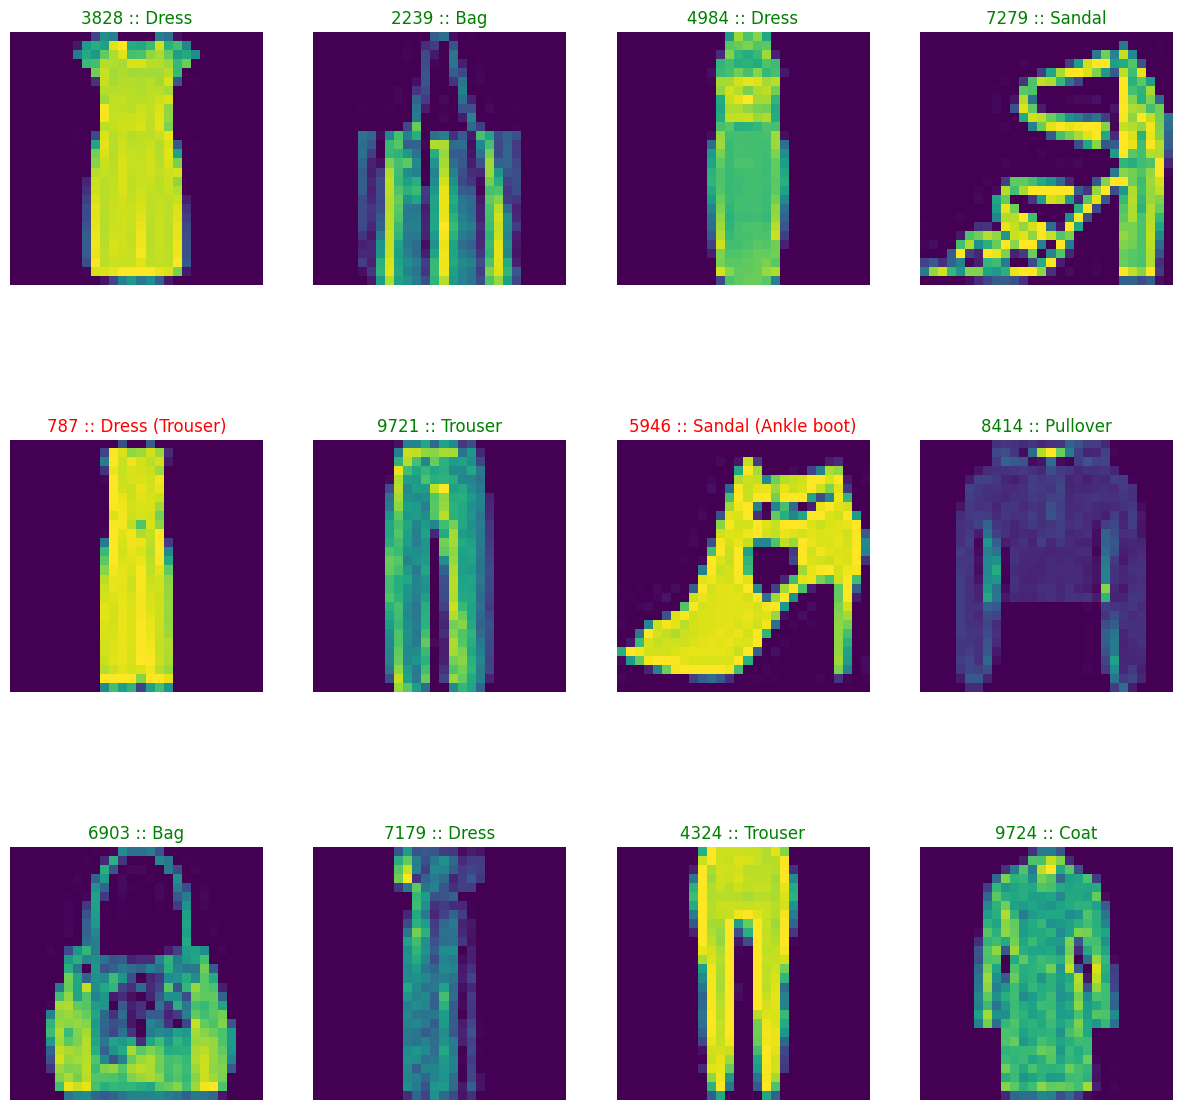

In [60]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [61]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 88.71%


#### Classification report

In [62]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.78      0.80      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.79      0.84      0.81      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.72      0.69      0.71      1000
     Sneaker       0.97      0.93      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.92      0.98      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



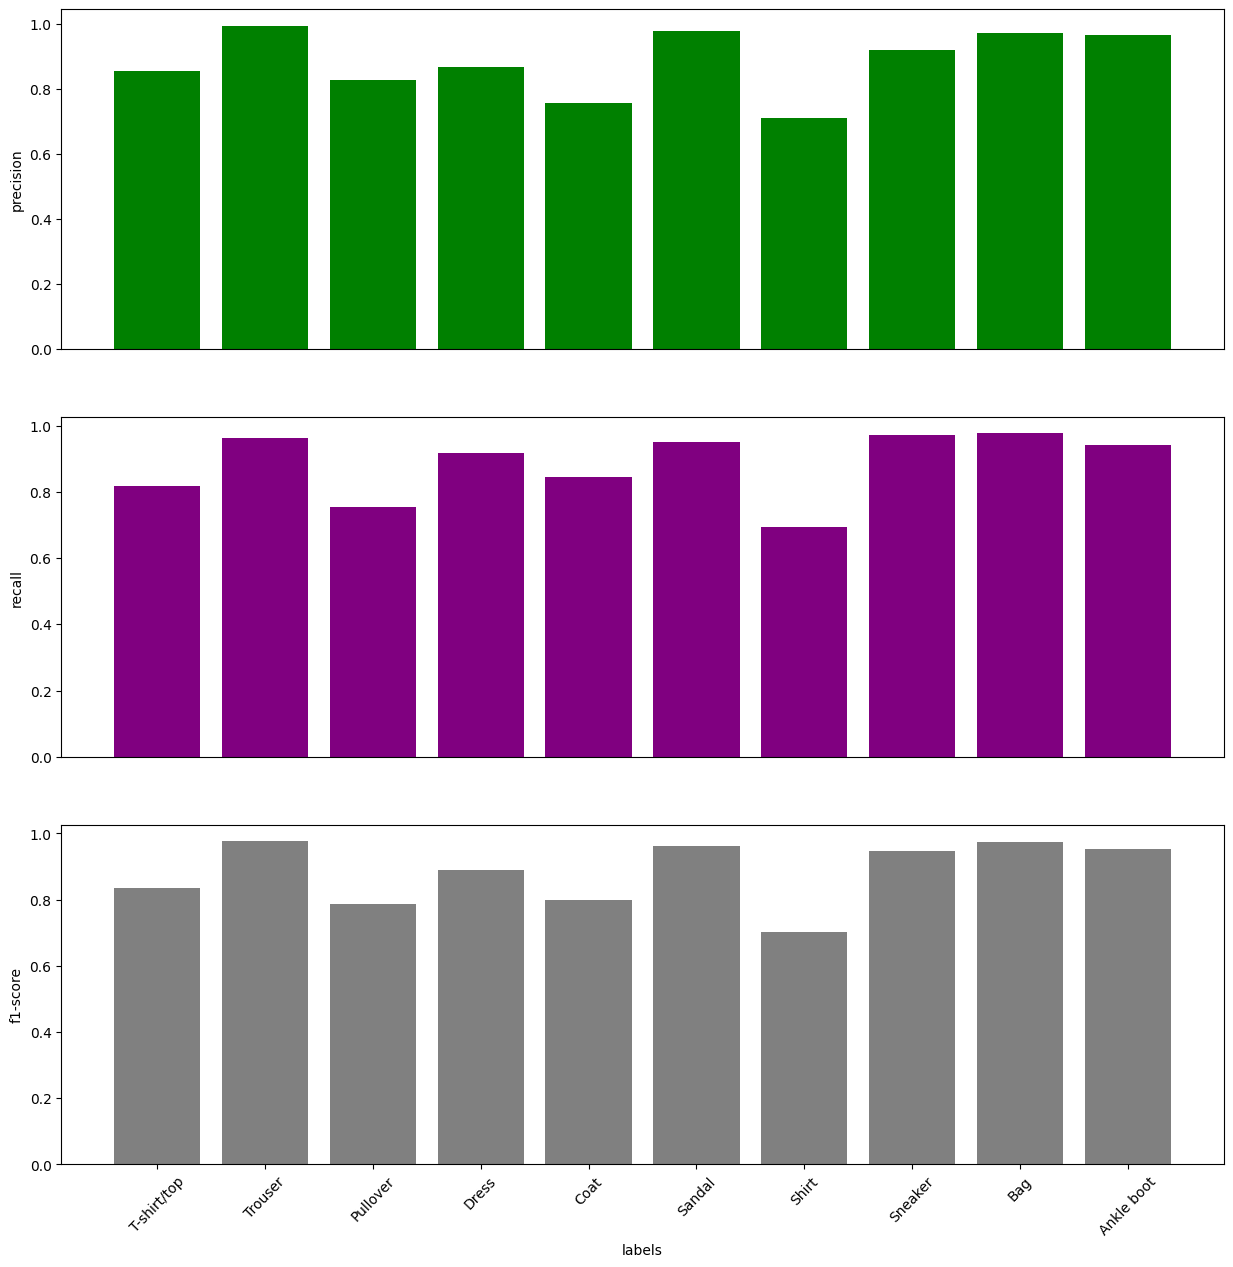

In [96]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])


plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

### Model Check Point and second hidden layer

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint

#### Model Sequential

In [65]:
model4 = Sequential()

model4.add(Dense(units=784, activation='relu', input_shape=(train_X.shape[1],)))
model4.add(Dense(units=128, activation='relu'))
model4.add(Dense(units=64, activation='relu'))
model4.add(Dense(units = 10, activation='softmax'))

model4.summary()

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,826 (2.76 MB)

 Trainable params: 724,826 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

#### check point and early stopping

In [66]:
checkpoint = ModelCheckpoint(filepath=f'model_checkpoint.keras',
                            monitor='val_accuracy', save_best_only=True)

In [67]:
earlystopping = EarlyStopping(patience=3, monitor='val_accuracy')

#### Model Compile

In [68]:
model4.compile(loss='categorical_crossentropy', metrics = ['accuracy'], 
               optimizer='adam')

#### Train model

In [69]:
model4.fit(x=train_X, y=train_y,
          epochs=20, validation_data=(val_X, val_y),
          callbacks=[earlystopping, checkpoint],
          batch_size=100)

Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7546 - loss: 0.6972 - val_accuracy: 0.8209 - val_loss: 0.4857
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8568 - loss: 0.3860 - val_accuracy: 0.8691 - val_loss: 0.3676
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8730 - loss: 0.3415 - val_accuracy: 0.8771 - val_loss: 0.3410
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8848 - loss: 0.3079 - val_accuracy: 0.8741 - val_loss: 0.3428
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8850 - loss: 0.3033 - val_accuracy: 0.8887 - val_loss: 0.3137
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8951 - loss: 0.2805 - val_accuracy: 0.8894 - val_loss: 0.3114
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9018 - loss: 0.2609 - val_accuracy: 0.8825 - val_loss: 0.3312
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9057 - loss: 0.2509 - val_a

#### Training evaluation

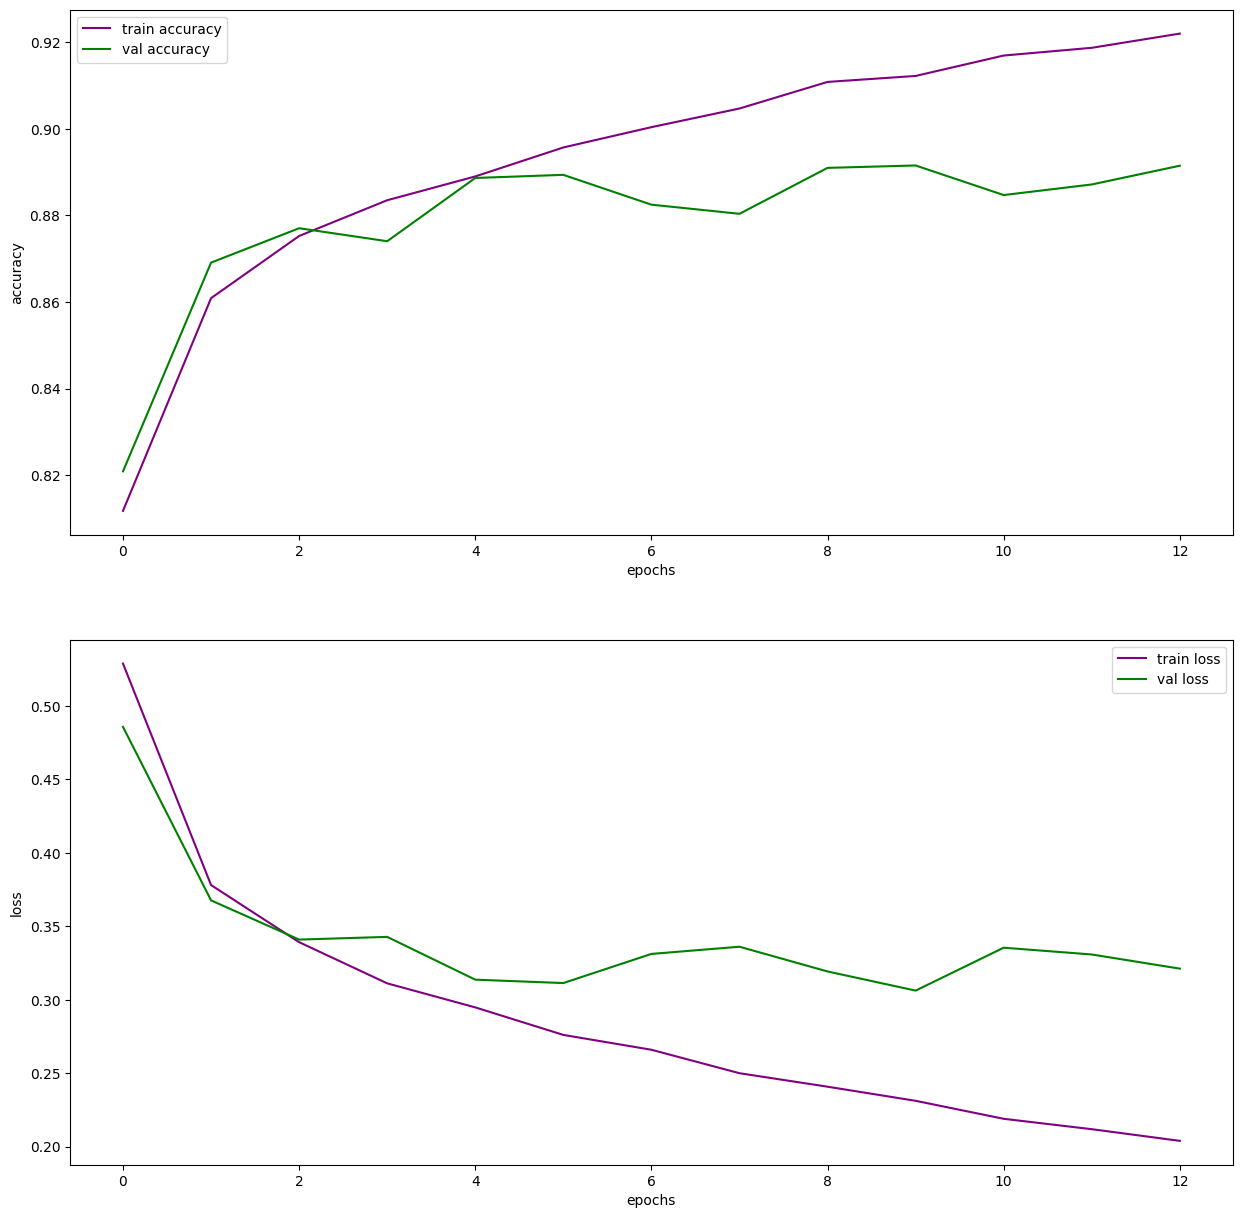

In [70]:
hist = model4.history.history

plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Test model

In [71]:
model4.load_weights('model_checkpoint.keras')

In [72]:
y_hat = model4.predict(flatten_X_test)
y_hat_idx = [np.argmax(pred) for pred in y_hat]
y_hat_idx[0], Y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


(9, 9)

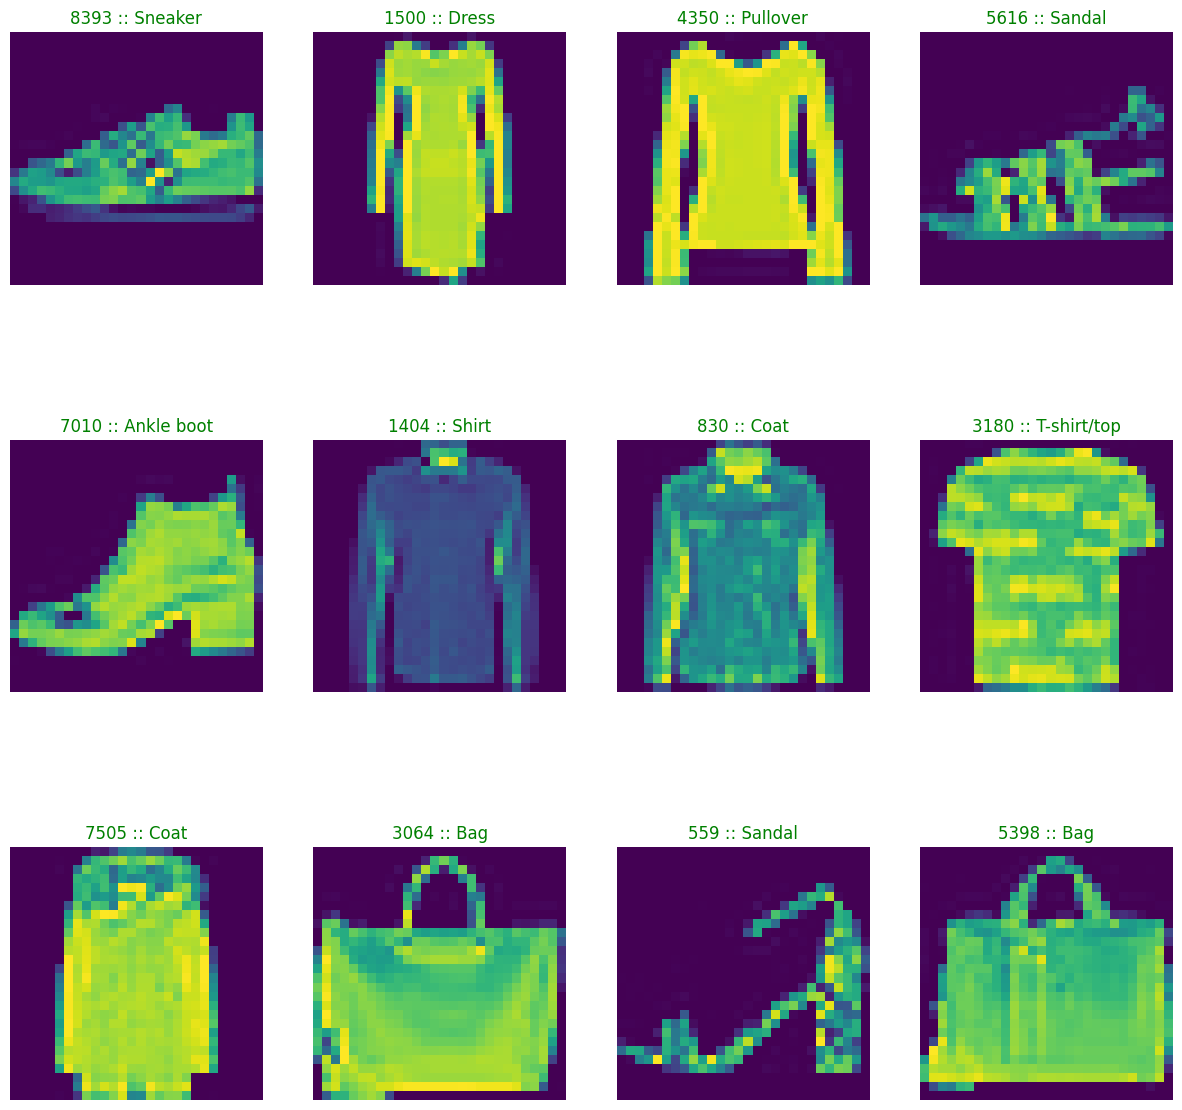

In [73]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [74]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 88.61%


####  Classification report

In [75]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.77      0.79      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.74      0.89      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.78      0.64      0.70      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



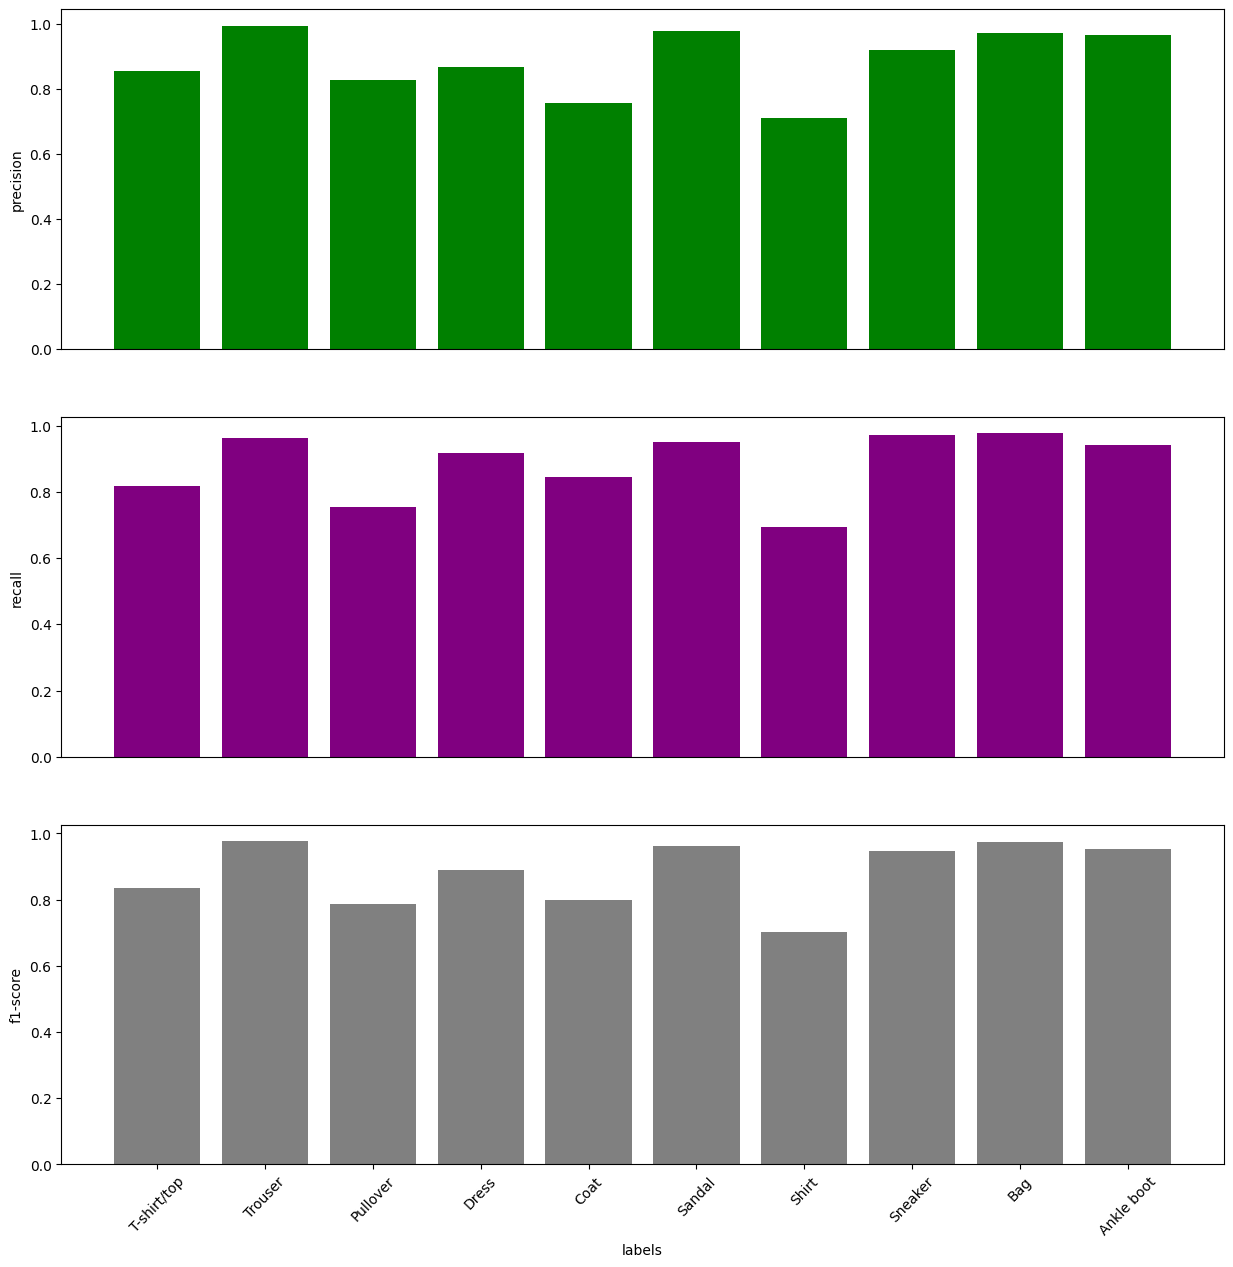

In [95]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])


plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

## Add Dropout 

In [77]:
from tensorflow.keras.layers import Dropout

### Model sequential

In [78]:
model5 = Sequential()
model5.add(Dense(units = 784, activation='relu', input_shape=(train_X.shape[1],)))
model5.add(Dense(units=128, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(units = 10, activation='softmax'))

model5.summary()

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717,210 (2.74 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

### Model compile

In [79]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

### Early stopping and check point

In [80]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience = 3)

In [81]:
check_point = ModelCheckpoint('model5_checkpoint.keras', save_best_only=True)

### Train model

In [82]:
model5.fit(x=train_X, y=train_y, validation_data=(val_X, val_y),
          callbacks=[early_stopping, check_point], epochs=20, batch_size=100)

Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.7401 - loss: 0.7376 - val_accuracy: 0.8381 - val_loss: 0.4285
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8489 - loss: 0.4104 - val_accuracy: 0.8688 - val_loss: 0.3649
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8654 - loss: 0.3645 - val_accuracy: 0.8622 - val_loss: 0.3706
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8768 - loss: 0.3355 - val_accuracy: 0.8789 - val_loss: 0.3315
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8837 - loss: 0.3118 - val_accuracy: 0.8836 - val_loss: 0.3185
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8928 - loss: 0.2949 - val_accuracy: 0.8830 - val_loss: 0.3245
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8936 - loss: 0.2837 - val_accuracy: 0.8855 - val_loss: 0.3156
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9012 - loss: 0.2644 - 

### Training evaluation

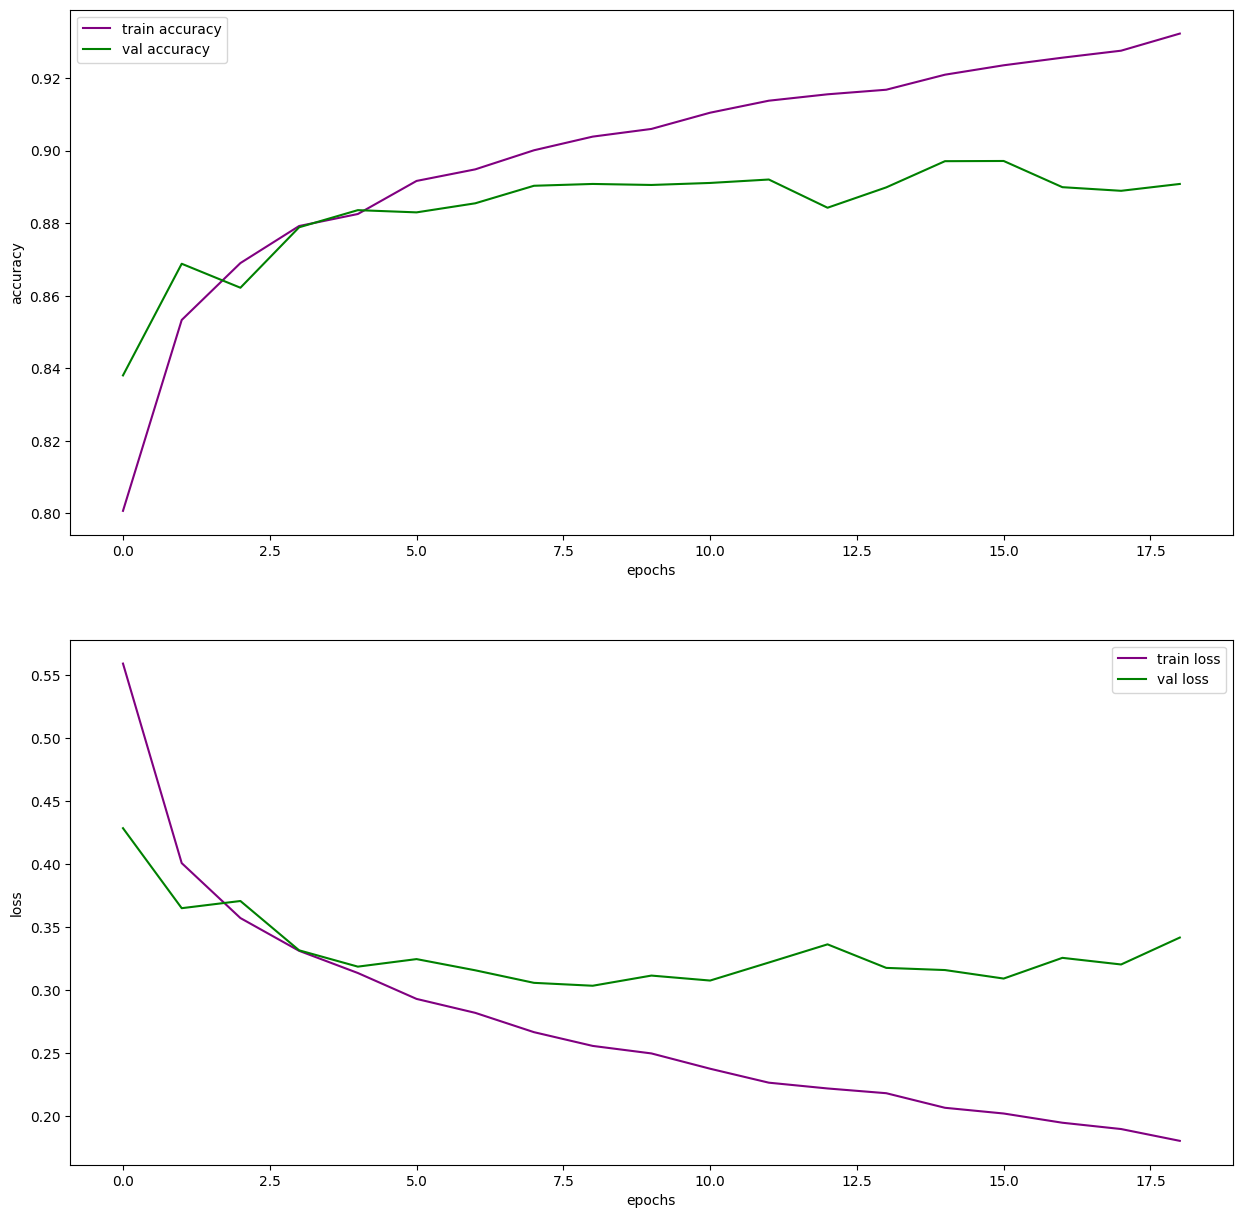

In [83]:
hist = model5.history.history

plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Test model

In [84]:
model5.load_weights('model5_checkpoint.keras')

In [85]:
y_hat = model5.predict(flatten_X_test)
y_hat_idx = [np.argmax(pred) for pred in y_hat]
y_hat_idx[0], Y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(9, 9)

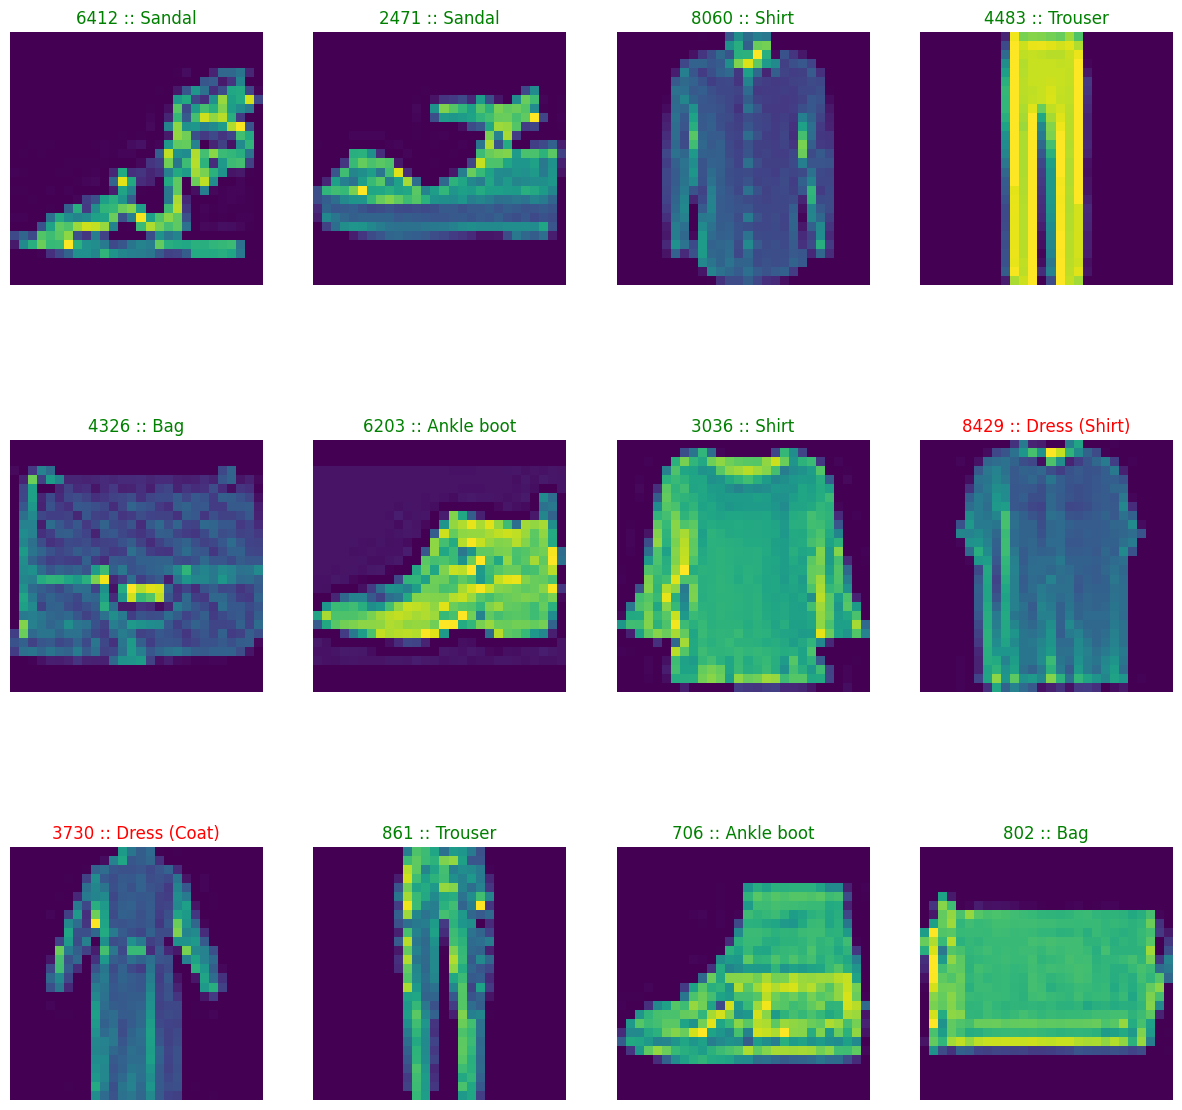

In [86]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [87]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 88.30%


### Classification Report 

In [88]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.83      0.75      0.79      1000
       Dress       0.87      0.92      0.89      1000
        Coat       0.76      0.84      0.80      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.71      0.69      0.70      1000
     Sneaker       0.92      0.97      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [89]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

In [91]:
precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])

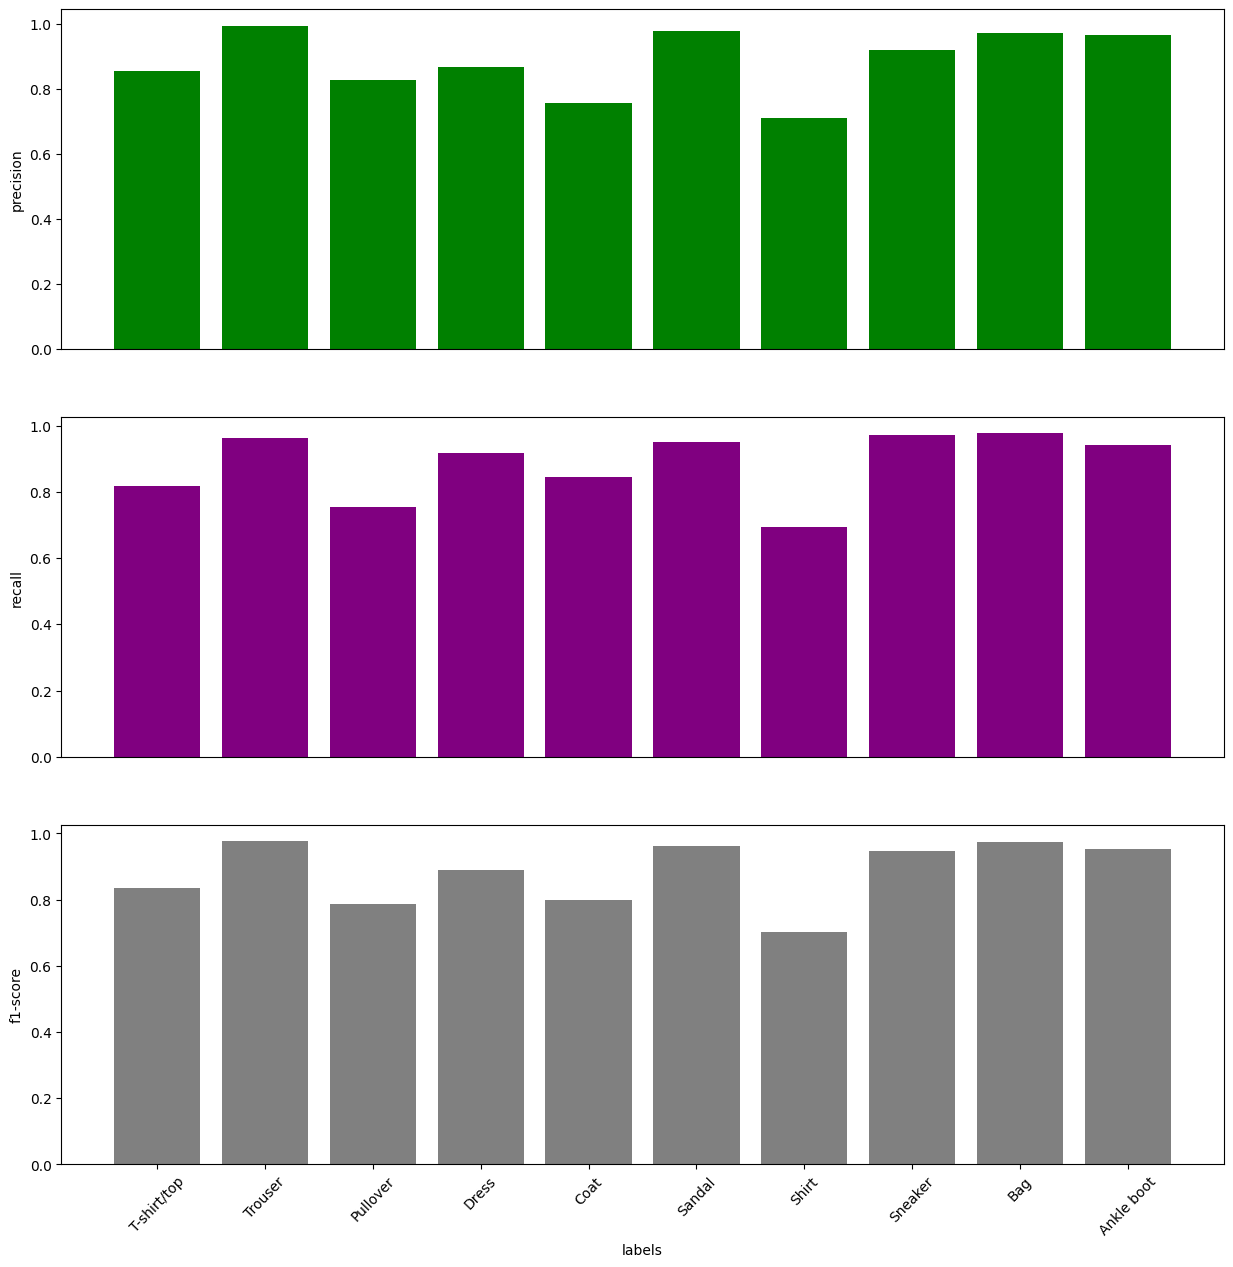

In [94]:
plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()